<a href="https://colab.research.google.com/github/pickachu17/Data-ScienceAIML/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [4]:
# loading the data from csv file to a pandas Datframe
insurance_dataset =pd.read_csv('/content/insurance.csv')

In [5]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [7]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Feature:

*   SEX
*   Smoker
*   Region







In [10]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data analysis


In [11]:
# statistical for missing values
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

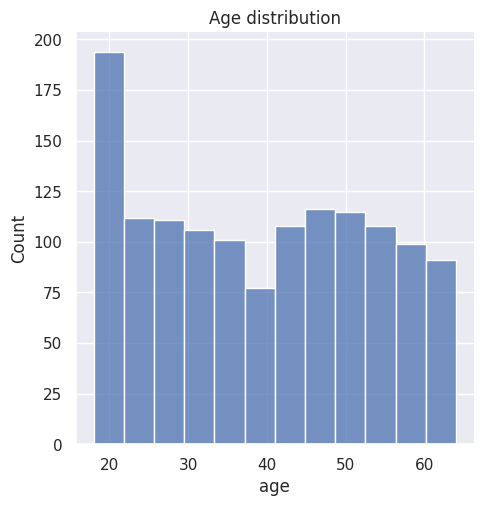

In [13]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

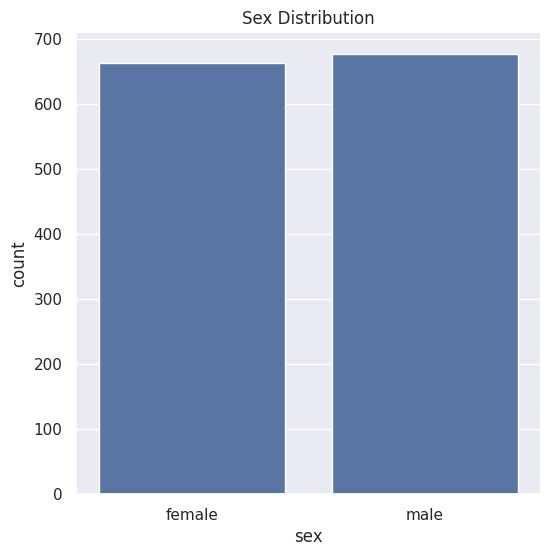

In [16]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x ='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [17]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

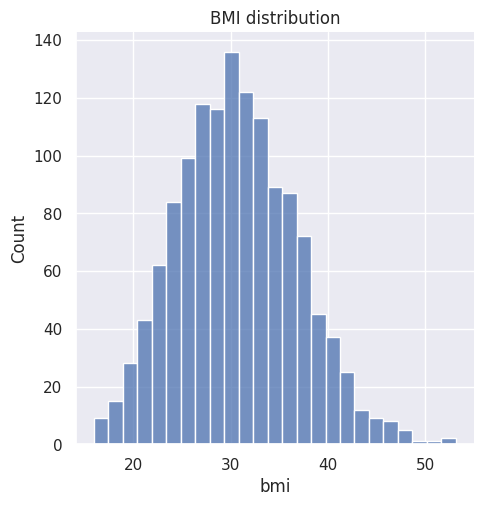

In [18]:
# bmi distribution
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI Range -->18.5 to 24.5

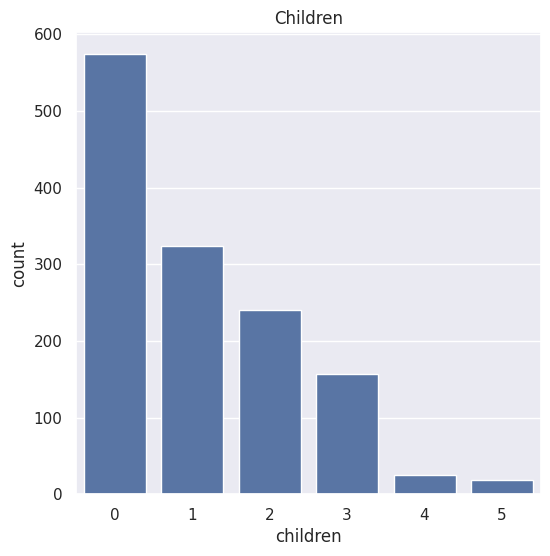

In [19]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_dataset)
plt.title('Children')
plt.show()

In [20]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

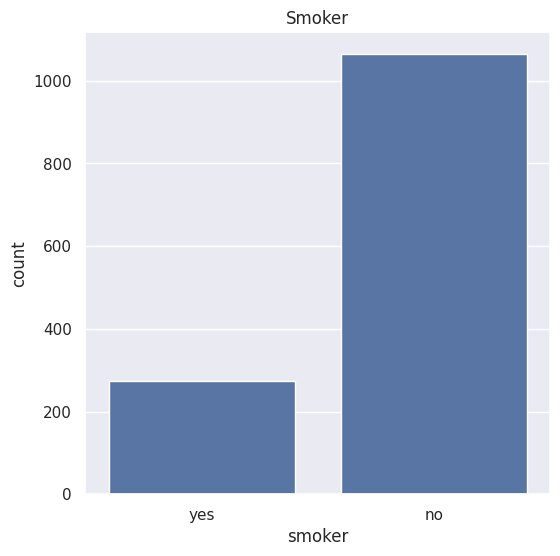

In [21]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = insurance_dataset)
plt.title('Smoker')
plt.show()


In [22]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

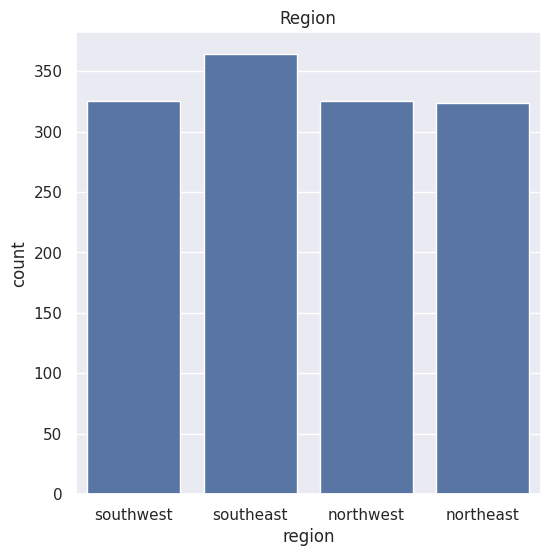

In [23]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_dataset)
plt.title('Region')
plt.show()


In [24]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

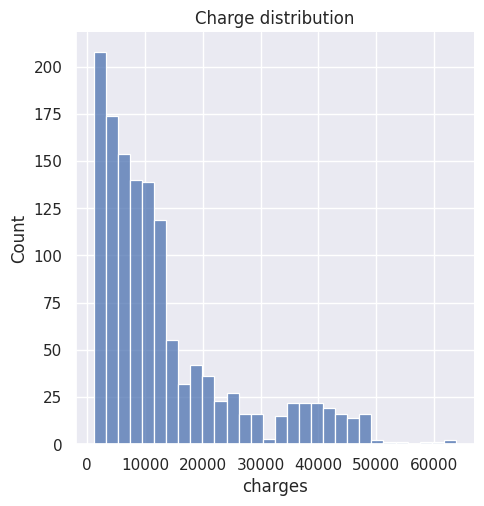

In [25]:
# distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charge distribution')
plt.show()

Data pre-Processing

Encoding the categorical features

In [32]:
# encoding 'sex' column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)

# rncoding 'region' column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast': 2, 'northwest':3}}, inplace = True )

Splitting the features and Target


In [33]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [34]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [35]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting data into Training data & Testing Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Traing

Linear Regression

In [39]:
# loading the Linear regression model
regressor = LinearRegression()

In [40]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evalustion

In [47]:
# prediction on training data

training_data_prediction = regressor.predict(X_train)

In [48]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :', r2_train)

R squared value : 0.751505643411174


In [50]:
# prediction on test data

test_data_prediction = regressor.predict(X_test)

In [51]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value :', r2_test)

R squared value : 0.7447273869684076


In [52]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
